<a href="https://colab.research.google.com/github/baldpanda/dog_breed_classifier/blob/running-cnn-on-kaggle-test/dog_breed_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Classification

Playing with TensorFlow and Neural Networks to build a classifier to predict the breed given an image of a dog. The source of the dataset was Kaggle and the competition related to this task can be found [here](https://www.kaggle.com/c/dog-breed-identification). Storing the training data on Google Drive for easy integration with colab. Using Colab to take advantage of the compute power and I'm not sure my current laptop could cope with this task.

In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
import random
print(tf.VERSION)

1.13.1


In [0]:
DRIVE_BASE_PATH = '/content/drive/My Drive/'
LABELS_PATH = DRIVE_BASE_PATH +  'dog_breed_classification/dog_breeds'
ST_BERNARD_SAMPLE_IMAGE_PATH = LABELS_PATH + '/saint_bernard/1b26fc0e227488f288c753c84a88ca6c.jpg'
MODEL_PATH = DRIVE_BASE_PATH + 'dog_breed_classification/model_test_one_epoch.h5'
TEST_DATA_PATH = DRIVE_BASE_PATH + 'dog_breed_classification/' + 'test/'

Loading in training data from Google Drive.

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Extracting the dog breed labels from Google Drive
dog_breeds = os.listdir(LABELS_PATH)

In [0]:
st_bernard_image = Image.open(ST_BERNARD_SAMPLE_IMAGE_PATH)

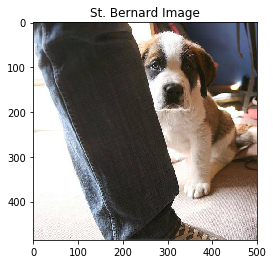

In [6]:
plt.imshow(st_bernard_image)
plt.title("St. Bernard Image")
plt.show()

## Baseline model

A baseline model could be to research the most common dog breed and always predict that breed. 

Based from some brief research the most common dog breed is a Labrador Retriever.

In [7]:
print("The accuracy of the baseline model on the training data is {0:.2f}%.".format(100 * len(os.listdir(LABELS_PATH + "/labrador_retriever"))/10222))

The accuracy of the baseline model on the training data is 0.82%.


## Training basic CNN using Keras

Using  Keras's ImageDataGenerator to label the images of dogs for training a CNN

In [0]:
train_data_generator = ImageDataGenerator(rescale = 1/255)

In [9]:
train_generator = train_data_generator.flow_from_directory(
    LABELS_PATH,
    target_size=(300,300),
    batch_size=269,
    class_mode='sparse'
)

Found 10222 images belonging to 120 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model = tf.keras.models.load_model("/content/drive/My Drive/dog_breed_classification/model_test_three_epochs.h5")

## Testing model on training image of St. Bernard shown previously

In [0]:
# reshaping and normalizing image to same format as training data
st_bernard_image_scaled = st_bernard_image.resize((300,300), Image.NEAREST)
np_st_bernard = np.array(st_bernard_image_scaled)
np_st_bernard = np_st_bernard / 255.0
np_st_bernard = np_st_bernard.reshape(1, 300, 300, 3)

In [14]:
predicted_breed = model.predict(np_st_bernard).argmax(axis=-1)[0]
dog_breeds[predicted_breed]

'samoyed'

## Creating a function to take image from training data at random and run model to make prediction

In [39]:
number_of_categories = len(dog_breeds)
print("The number of different breeds in the training data are {}.".format(number_of_categories))

The number of different breeds in the training data are 120.


In [40]:
# Picking dog at random from training data
rand_picked_breed = dog_breeds[random.randint(1,number_of_categories)]
print("The breed picked at random is {}.".format(rand_picked_breed))

The breed picked at random is borzoi.


In [0]:
path_for_rand_breed = LABELS_PATH + "/" + rand_picked_breed
images_in_directory = os.listdir(path_for_rand_breed)
rand_picked_image = images_in_directory[random.randint(1, len(images_in_directory))]
rand_image_path = path_for_rand_breed + "/" + rand_picked_image
rand_picked_image = Image.open(rand_image_path)

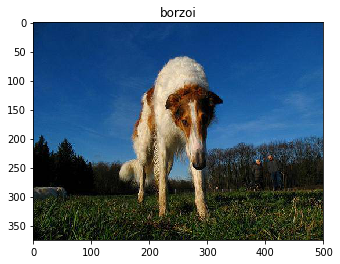

In [42]:
plt.imshow(rand_picked_image)
plt.title(rand_picked_breed)
plt.show()

In [0]:
rand_picked_image_scaled = rand_picked_image.resize((300, 300), Image.NEAREST)
np_rand_picked_image_scaled = np.array(rand_picked_image_scaled)
np_rand_picked_image_norm = np_rand_picked_image_scaled / 255.0
np_rand_picked_image_norm = np_rand_picked_image_norm.reshape(1, 300, 300, 3)

In [44]:
predicted_breed = dog_breeds[model.predict(np_rand_picked_image_norm).argmax(axis=-1)[0]]
print("Predicted breed of dog is {}, and the actual breed is {}.".format(predicted_breed, rand_picked_breed))

Predicted breed of dog is borzoi, and the actual breed is borzoi.


Making functions to format image and to predict its breed

In [0]:
def format_image_for_model(image):
  image_scaled = image.resize((300, 300), Image.NEAREST)
  image_scaled_array = np.array(image_scaled)
  image_scaled_array_norm = image_scaled_array / 255.0
  image_scaled_array_norm = image_scaled_array_norm.reshape(1, 300, 300, 3)
  return image_scaled_array_norm

In [0]:
def predict_breed(model, image, labels):
  formatted_image = format_image_for_model(image)
  model_prediction = model.predict(formatted_image).argmax(axis=-1)[0]
  predicted_breed = labels[model_prediction]
  return predicted_breed

In [0]:
def output_prob_from_image(model, image, labels):
  formatted_image = format_image_for_model(image)
  model_prediction = model.predict(formatted_image)
  return model_prediction

In [48]:
predict_breed(model, rand_picked_image, dog_breeds)

'borzoi'

## Training model for 3 epochs to try and improve accuracy

In [0]:
# history = model.fit_generator(train_generator, steps_per_epoch=38, epochs=3, verbose=2)

In [0]:
# model.save("/content/drive/My Drive/dog_breed_classification/model_test_three_epochs.h5")

In [51]:
predict_breed(model, rand_picked_image, dog_breeds)

'borzoi'

## Testing how the model generalises on Kaggle test set

Format requried for evaluation submission:

- File type should be csv format
- Needs header- "id,affenpinscher,afghan_hound,...,yorkshire_terrier"
- The id field is the name of the image file, without the '.jpg' at the end
- The fields under each breed, should be the probabilities that images are that breed
- As mentioned previously, the performance metric is multi class log loss

In [0]:
HEADER_TEST_FILE = ','.join(dog_breeds)
test_image_path = os.listdir(TEST_DATA_PATH)
print(test_image_path[:5])

['e7dc8cc599049ea9fa2a172c88646c57.jpg', 'e7ce78e874945f182a4f5149aa505b09.jpg', 'e7e9624f2a2e61ab187358f5968bfde8.jpg', 'e7ed96b272013c6de9505a753816ce75.jpg', 'e7feb64da6aae1ef8e62453f6660d0c5.jpg']


In [0]:
print(len(test_image_path))

10366


In [0]:
number_of_test_images = len(test_image_path)
print("The number of images in the test {}.".format(number_of_test_images))

The number of images in the test 10366.


In [0]:
#test_predictions = pd.DataFrame(columns=dog_breeds)
#i = 0
#image_ids = []
#for image in test_image_path:
#  image_ids.append(image[:-4])
#  image_full_path = TEST_DATA_PATH + image
#  image_pix = Image.open(image_full_path)
#  prediction = output_prob_from_image(model, image_pix, dog_breeds)[0]
#  test_predictions = test_predictions.append(pd.DataFrame([prediction], columns=dog_breeds))
  
#  if (i % 500)== 0:
#    print("iteration {}".format(i))
#  i = i + 1

iteration 0
iteration 500
iteration 1000
iteration 1500
iteration 2000
iteration 2500
iteration 3000
iteration 3500
iteration 4000
iteration 4500
iteration 5000
iteration 5500
iteration 6000
iteration 6500
iteration 7000
iteration 7500
iteration 8000
iteration 8500
iteration 9000
iteration 9500
iteration 10000


In [0]:
#test_predictions = test_predictions.sort_index(axis=1)
#test_predictions['id'] = image_ids

In [0]:
#test_predictions.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,id
0,0.026910,0.007084,0.011525,0.004608,0.002549,0.010306,0.005950,0.004350,0.004316,0.005005,...,0.002629,0.019811,0.011863,0.014254,0.006007,0.001206,0.007108,0.008088,0.012462,e7dc8cc599049ea9fa2a172c88646c57
0,0.035492,0.001866,0.001022,0.006738,0.012503,0.046747,0.003920,0.014954,0.083721,0.005492,...,0.001266,0.000507,0.001259,0.002937,0.002413,0.017381,0.013716,0.002505,0.000779,e7ce78e874945f182a4f5149aa505b09
0,0.013321,0.013664,0.003345,0.006247,0.001124,0.005592,0.005735,0.003092,0.002599,0.013236,...,0.003550,0.010217,0.024588,0.009845,0.007839,0.002711,0.005381,0.018212,0.008111,e7e9624f2a2e61ab187358f5968bfde8
0,0.014536,0.001218,0.003628,0.006695,0.001042,0.033541,0.011387,0.027885,0.037966,0.013196,...,0.003873,0.001784,0.004705,0.006284,0.006485,0.019211,0.010177,0.016623,0.002907,e7ed96b272013c6de9505a753816ce75
0,0.009774,0.002157,0.006194,0.004804,0.001689,0.018582,0.004508,0.008175,0.015564,0.009669,...,0.006962,0.004701,0.011734,0.009356,0.011363,0.009794,0.010214,0.008465,0.014182,e7feb64da6aae1ef8e62453f6660d0c5


In [0]:
#columns = test_predictions.columns.tolist()
#columns = columns[-1:] + columns[:-1]

In [0]:
#test_predictions[columns].shape

(10366, 121)

In [0]:
#test_predictions[columns].to_csv(DRIVE_BASE_PATH + 'dog_breed_classification/' + 'kaggle_test_predictions.csv', index=None, header=True)

There should be 10,357 images but have uploaded 10366 to the G-drive some how. Have tried to identitfy if there are any duplicates, but is not obvious. Will try and and do some more analysis to see what went wrong. 

In [73]:
test_predictions = pd.read_csv(DRIVE_BASE_PATH + 'dog_breed_classification/' + 'kaggle_test_predictions_id_first.csv')
test_predictions.shape


(10366, 121)

In [0]:
test_predictions['duplicates'] = test_predictions["id"].str.find("(")

When uploading some of the images to Google Drive, a few had been copied more than once. In the names of the duplicated images, they had a number in brackets, like "(1)"".  These have now been found and removed.

In [0]:
test_predictions = test_predictions[test_predictions.duplicates == -1].drop("duplicates", axis=1)

In [99]:
test_predictions.shape

(10357, 121)

In [0]:
test_predictions.to_csv(DRIVE_BASE_PATH + 'dog_breed_classification/' + 'kaggle_test_predictions_no_dups.csv', index=None, header=True)

The simple 3 epoch CNN achieved a loss of 5.41043 on the Kaggle test set. This would have ranked 1198 out of 1286 teams. A model which assigned equal probability would get a loss of 4.78749. The result here is not ideal, but the CNN was only trained for 3 epochs and there is still plenty of scope for improvement.

# Notes 

Machine interrupted whilst training. The first epoch took approx 3000 secs = 50 mins

=> The training would take 12.5 hours to train on standard machine. Having another go on a TPU enabled one (fingers crossed)

Also, on first epoch the model achieved an accuracy of just slightly better than guessing the same label (i.e. St. Bernard) for all the images